In [1230]:
#ENG: Import libraries

#Importação de bibliotecas para tratamento dos dados
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import seaborn as sns

In [1231]:
#ENG: Read database with stock prices from Aug/2019 to Aug/2021 for the companies listed below:
#Arezzo&Co, B3, Klabin, Localiza, Lojas Americanas, Multiplan, Petrobras, SulAmerica, Vale

#Leitura da base de dados Base_Retornos_Ações com preços de ações de 30/08/2019 a 27/08/2021, para as empresas:
# Arezzo&Co, B3, Klabin, Localiza, Lojas Americanas, Multiplan, Petrobras, SulAmerica, Vale
df = pd.read_csv('base_retornos_acoes.csv',sep=';',decimal=',')

#Convertendo campo "Data" em formato Data (originalmente carregado como object):
df["Data"] = pd.to_datetime(df["Data"],format= '%d/%m/%y')

#Fazendo o reset do Index para facilitar na hora de plotar nos gráficos de linha
df.set_index("Data",drop=True,inplace=True)

df.head()

,Arezzo&Co,B3,Klabin,Localiza,Lojas Americanas,Multiplan,Petrobras,Rede Atacadao,SulAmerica,Vale
Data,,,,,,,,,,
2021-08-27,92.39,13.94,26.72,58.30,5.95,21.48,28.49,18.75,29.58,100.69
2021-08-26,91.32,13.66,26.37,55.96,5.95,21.07,27.49,18.45,29.28,98.23
2021-08-25,92.63,13.99,26.67,57.53,5.81,21.80,27.73,18.89,30.00,99.50
2021-08-24,91.74,13.90,25.67,57.05,5.87,21.93,27.58,18.87,30.26,99.71
2021-08-23,90.25,13.65,25.17,56.43,5.25,21.26,27.02,18.80,29.32,96.20


In [1232]:
#ENG: Validate missing data

#Validação de dados Missing
def show_missing(df):
    """Retorna um dataframe Pandas descrevendo o conteúdo e incluindo valores Missing"""
    
    variables = []
    dtypes = []
    count = []
    unique = []
    missing = []
    pc_missing = []
    
    for item in df.columns:
        variables.append(item)
        dtypes.append(df[item].dtype)
        count.append(len(df[item]))
        unique.append(len(df[item].unique()))
        missing.append(df[item].isna().sum())
        pc_missing.append(round((df[item].isna().sum() / len(df[item])) * 100, 2))

    output = pd.DataFrame({
        'variable': variables, 
        'dtype': dtypes,
        'count': count,
        'unique': unique,
        'missing': missing, 
        'pc_missing': pc_missing
    })    
        
    return output

In [1233]:
#ENG: Check for duplicates and missing data

#Entendendo os dados
print('Linhas e Colunas: ',df.shape)

#Checando Duplicados
print('Duplicados: ', df.duplicated().sum())

show_missing(df)

Linhas e Colunas:  (492, 10)
Duplicados:  0


,variable,dtype,count,unique,missing,pc_missing
0,Arezzo&Co,float64,492,450,0,0.0
1,B3,float64,492,361,0,0.0
2,Klabin,float64,492,410,0,0.0
3,Localiza,float64,492,450,0,0.0
4,Lojas Americanas,float64,492,425,0,0.0
5,Multiplan,float64,492,390,0,0.0
6,Petrobras,float64,492,407,0,0.0
7,Rede Atacadao,float64,492,309,0,0.0
8,SulAmerica,float64,492,434,0,0.0
9,Vale,float64,492,467,0,0.0


Report inicial:
1) Dataset com 491 observações, 11 variáveis.
2) Não há observações com valores missing / nulos ou duplicados.
3) Das 11 variáveis, 10 são numéricas e 1 é categórica (data), que transformamos em índice para facilitar a manipulação e análise dos dados.

<function matplotlib.pyplot.show(close=None, block=None)>

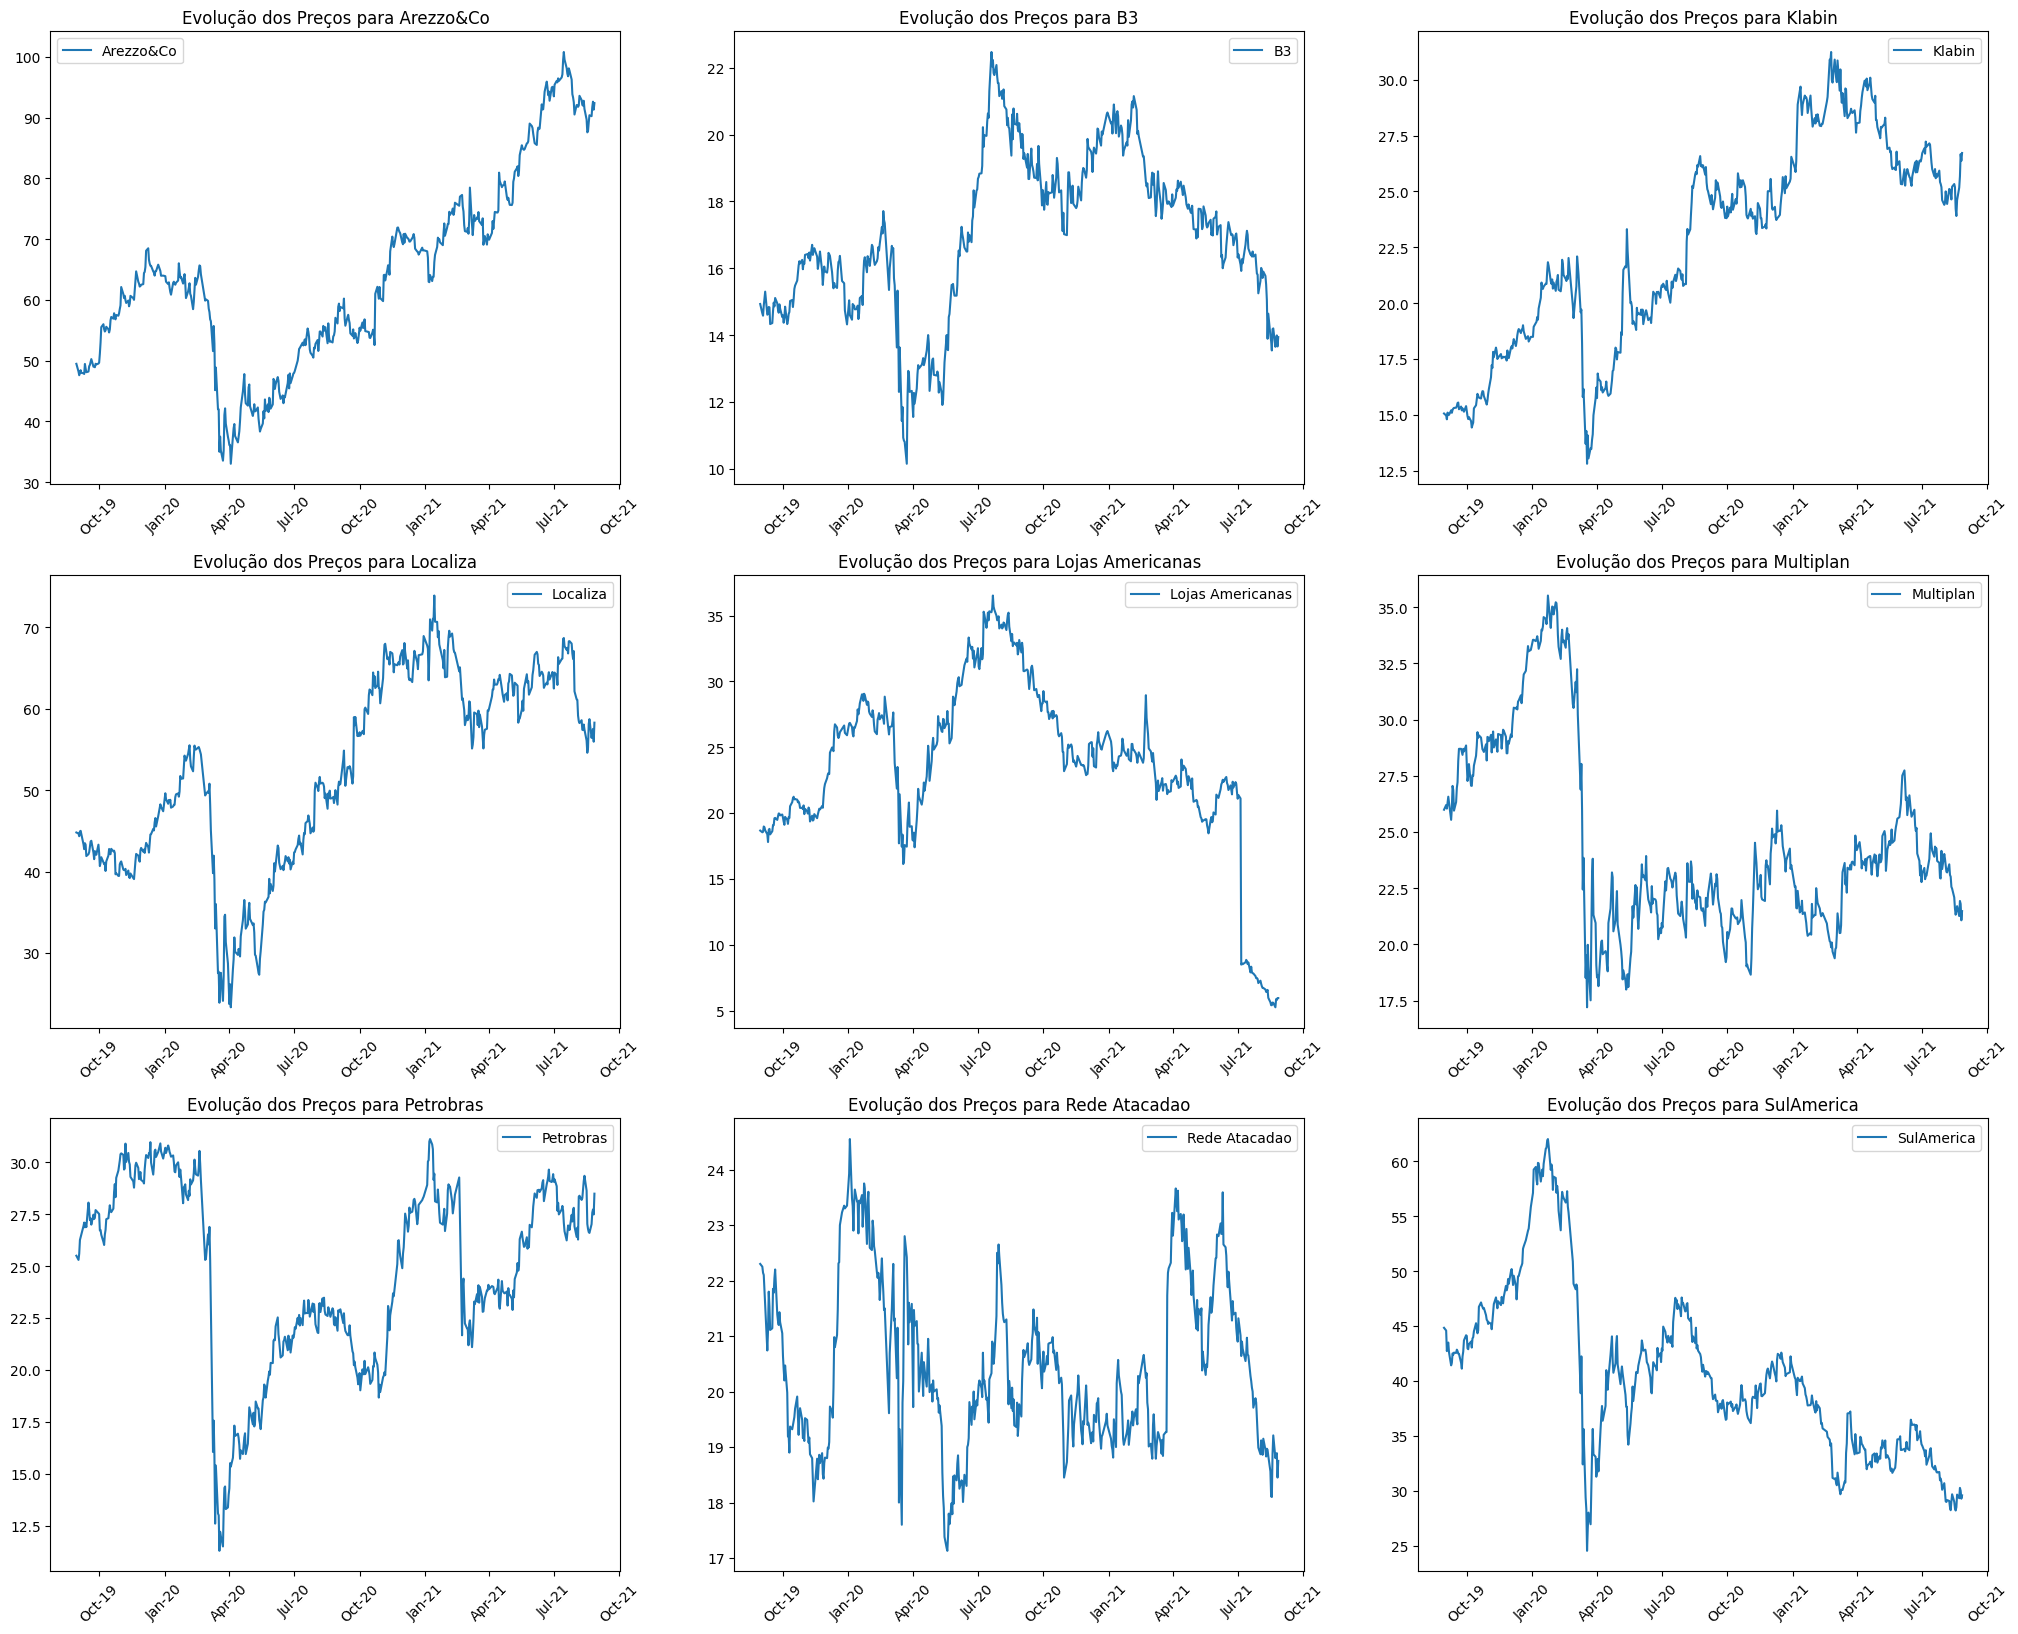

In [1234]:
#ENG: Define subplots for the time series with stock prices for each ticker/company

# Definindo uma matriz para subplots, para organizar os gráficos de série temporal com o preço de cada ação separadamente
nrows = 3
ncols = 3
k = 0
column_names = list(df.columns)

# Cria uma matriz com os gráficos de linha individuais para cada Ticker
fig, axs = plt.subplots(nrows, ncols, figsize=(25, 20))

for i in range(nrows):        
    for j in range(ncols):   
        axs[i,j].plot(df.index, df[column_names[k]], label=column_names[k])
        axs[i,j].legend()
        axs[i,j].set_title(f"Evolução dos Preços para {column_names[k]}")
        k = k+1
        myFmt = DateFormatter("%b-%y")
        axs[i,j].xaxis.set_major_formatter(myFmt)
        axs[i,j].tick_params(axis='x', labelrotation=45)

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

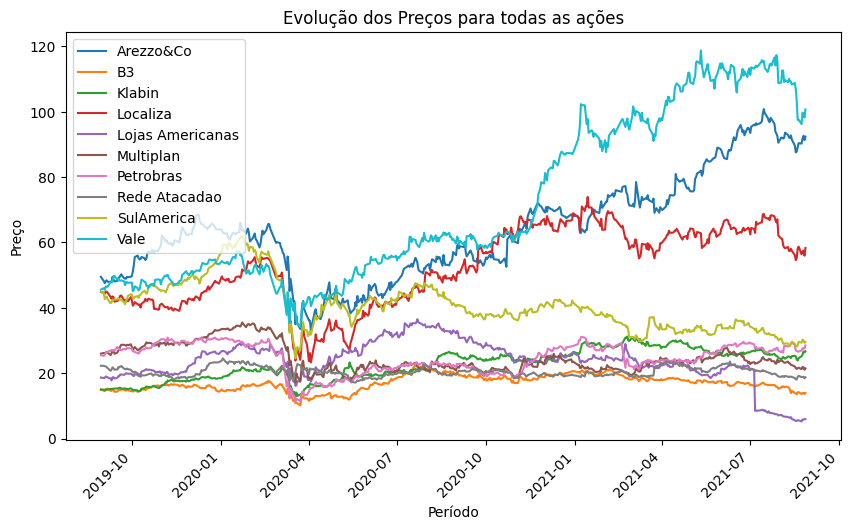

In [1235]:
#ENG: Plotting the time series with stock prices for all companies

#Fazendo o plot agora da série temporal com todas as ações dessa carteira
column_names = list(df.columns)

fig = plt.figure(figsize=(10,6))

#Agora plotando o gráfico com todos os índices juntos
for i in column_names:        
    df[i].plot(x=df.index, y=df[i], kind='line', title='Evolução dos Preços para todas as ações', legend=1, xlabel='Período', ylabel = 'Preço')
    plt.xticks(rotation=45)
plt.show

In [1236]:
#ENG: Calculate the returns in a new dataframe

#Calculando os retornos diários em um novo dataframe
column_names = list(df.columns)
dfret = df.copy()

for i in column_names:
    dfret[i] = df[i].pct_change()

In [1237]:
dfret.tail()

,Arezzo&Co,B3,Klabin,Localiza,Lojas Americanas,Multiplan,Petrobras,Rede Atacadao,SulAmerica,Vale
Data,,,,,,,,,,
2019-09-05,0.009169,-0.013072,-0.000667,0.008969,0.012306,0.010266,-0.004902,0.014385,0.020887,0.001507
2019-09-04,-0.007020,-0.014570,0.007338,-0.001556,0.003171,-0.010162,-0.004926,0.010979,-0.004138,0.000000
2019-09-03,-0.010189,-0.020161,-0.019868,-0.013132,-0.021602,-0.009886,-0.025133,0.001810,-0.013850,-0.021496
2019-09-02,0.012605,0.004801,0.011486,0.007442,-0.001616,0.006144,-0.011719,0.004968,0.043773,0.010764
2019-08-30,0.026556,0.019113,0.006012,0.002910,0.007012,-0.008015,0.007905,0.002247,0.005607,-0.009563


<function matplotlib.pyplot.show(close=None, block=None)>

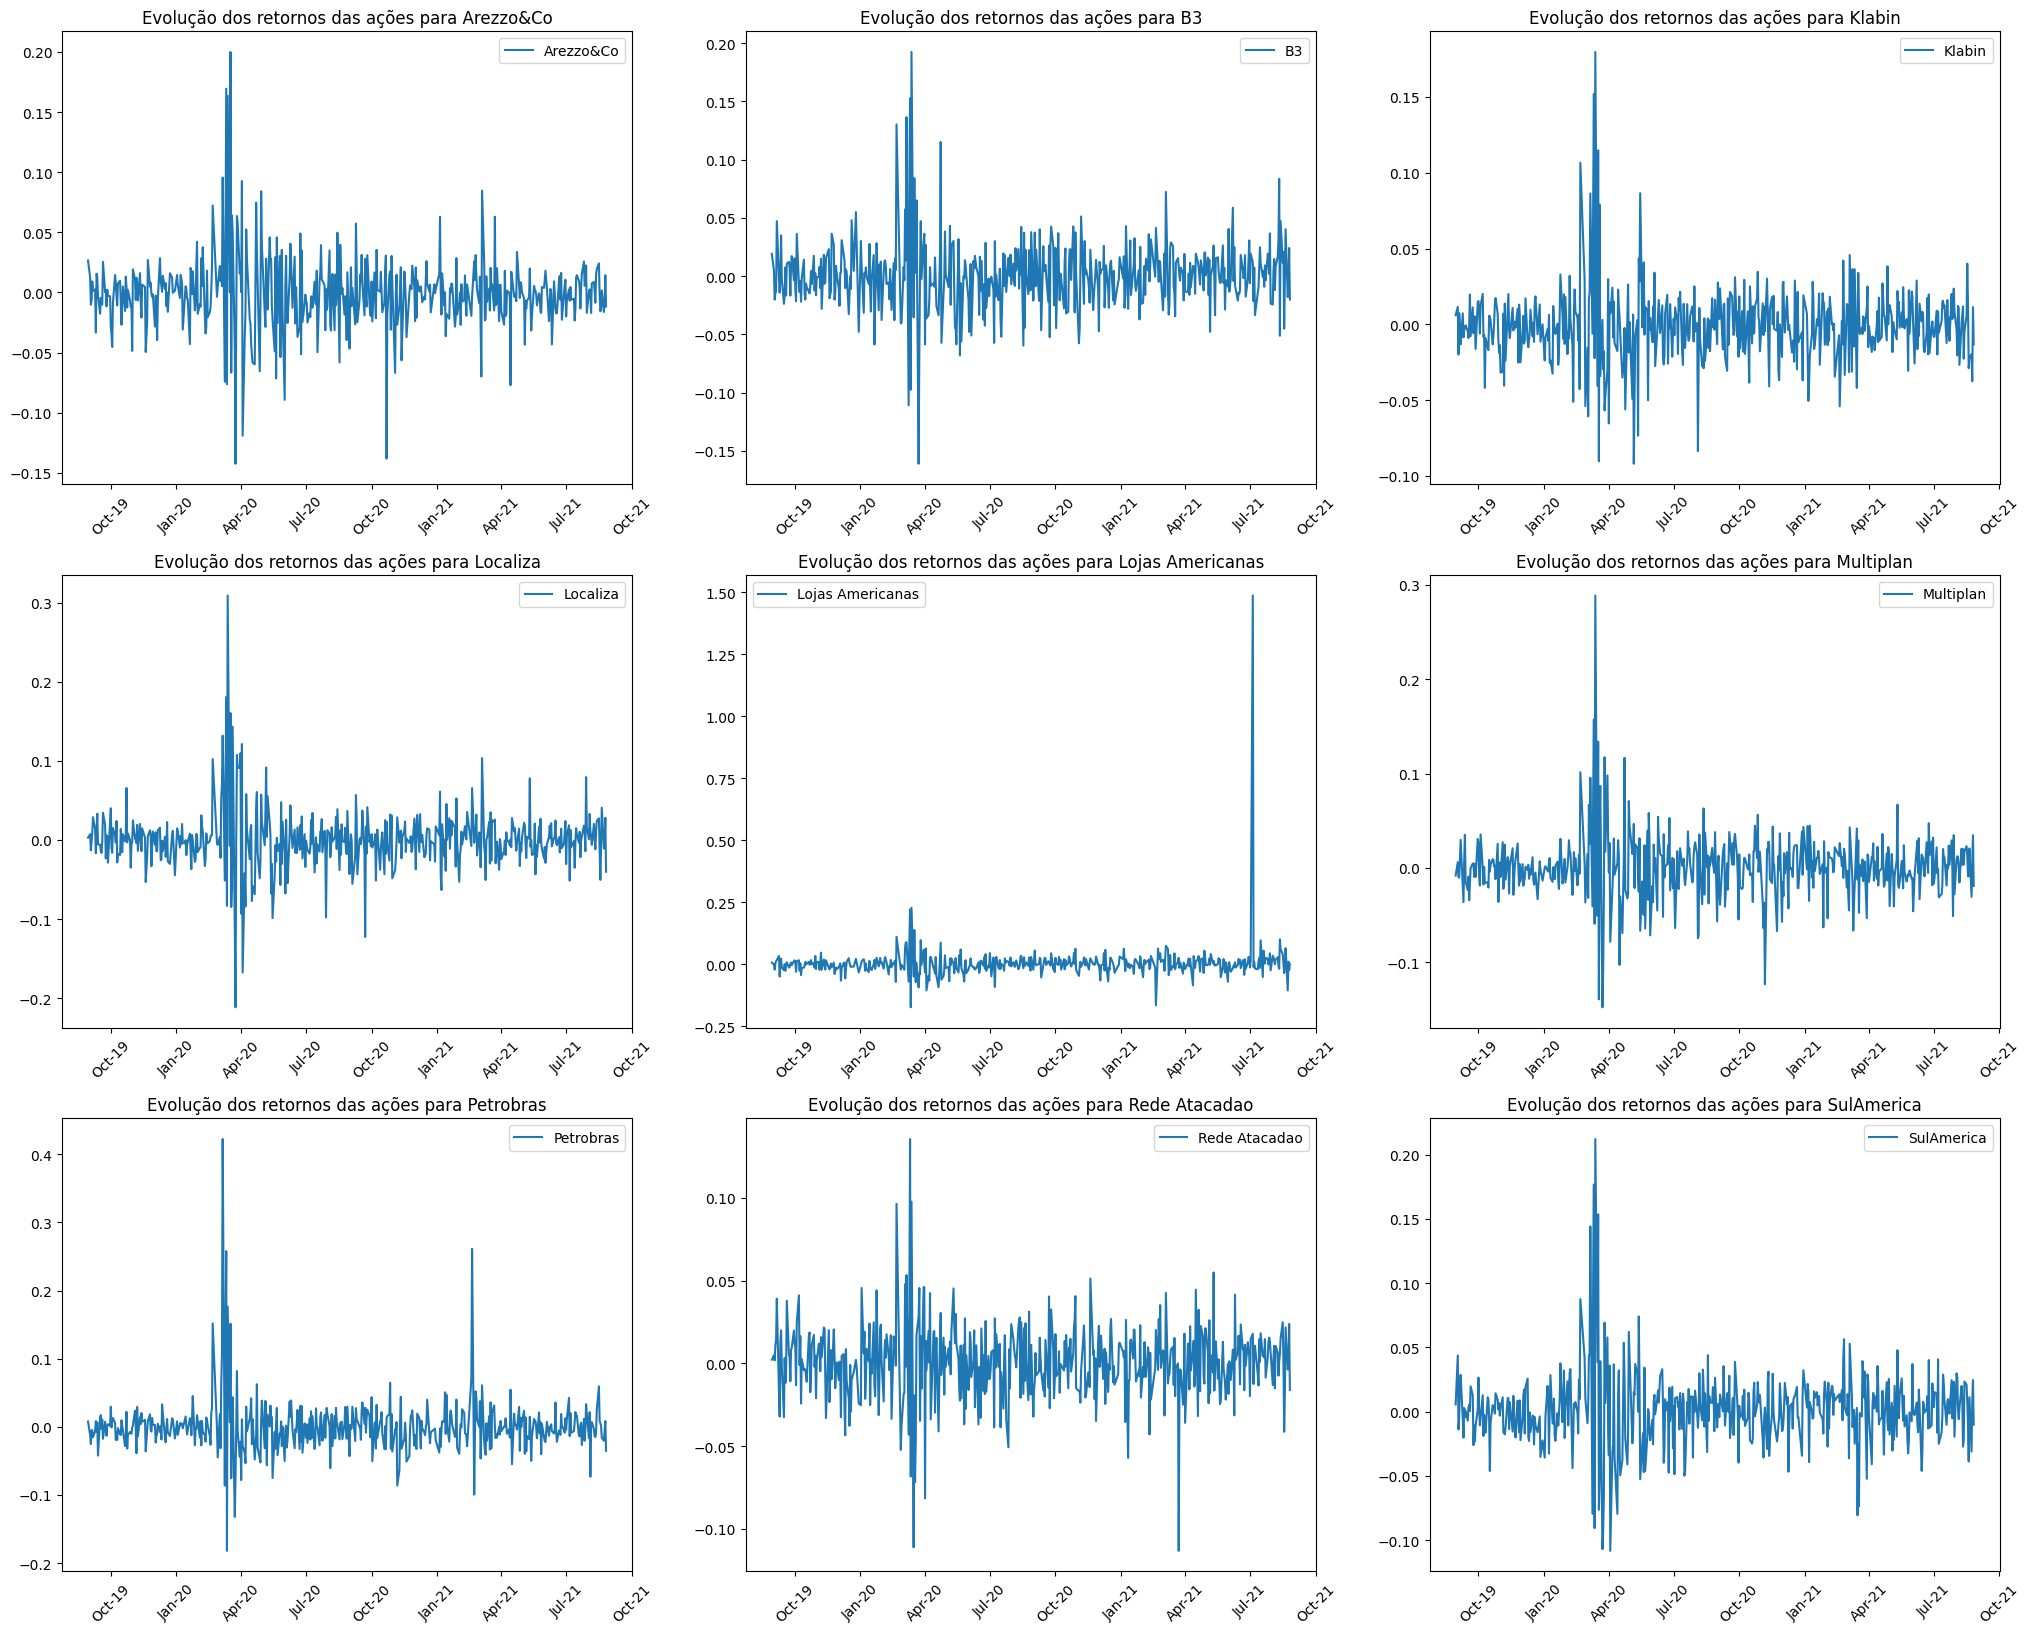

In [1238]:
#ENG: Define a subplot with returns from all companies separately

# Definindo uma nova matriz de subplots para trazer os retornos de cada ação separadamente
nrows = 3
ncols = 3
k = 0
column_names = list(df.columns)

# Cria uma matriz com os gráficos de linha individuais para cada Ticker
fig, axs = plt.subplots(nrows, ncols, figsize=(25, 20))

for i in range(nrows):
    for j in range(ncols):
        axs[i,j].plot(dfret.index, dfret[column_names[k]], label=column_names[k])
        axs[i,j].legend()
        axs[i,j].set_title(f"Evolução dos retornos das ações para {column_names[k]}")
        k = k+1
        myFmt = DateFormatter("%b-%y")
        axs[i,j].xaxis.set_major_formatter(myFmt)
        axs[i,j].tick_params(axis='x', labelrotation=45)

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

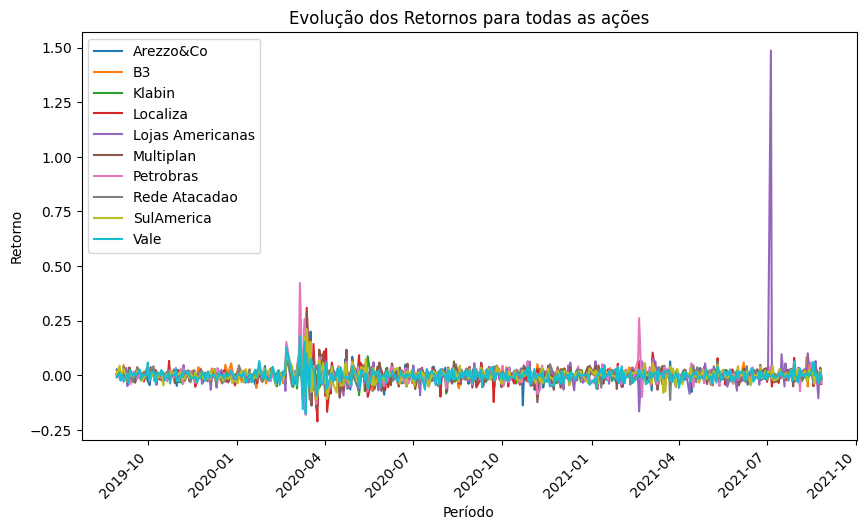

In [1239]:
#ENG: Plotting the time series with all companies in the portfolio

#Fazendo o plot agora da série temporal com todas as ações dessa carteira
column_names = list(df.columns)

fig = plt.figure(figsize=(10,6))

#Agora plotando o gráfico com todos os índices juntos
for i in column_names:        
    dfret[i].plot(x=dfret.index, y=df[i], kind='line', title='Evolução dos Retornos para todas as ações', legend=1, xlabel='Período', ylabel = 'Retorno')
    plt.xticks(rotation=45)
plt.show

In [1240]:
#ENG: New dataframe to store the volatility (standard deviation of returns) for each company

#Novo dataframe para guardar a Volatilidade (Desvio Padrão dos retornos) para cada ativo
dfvol = pd.DataFrame(index=column_names, columns=['Volatilidade'])
dfvol = dfvol.astype(dtype={'Volatilidade':'object'})

for i in range(len(column_names)):        
    dfvol.loc[column_names[i]]['Volatilidade'] = str(round(dfret[column_names[i]].std()*100,2))+'%' #guardando como string para poder mostrar o percentual

dfvol.sort_values(by='Volatilidade',ascending=False).head(10)

,Volatilidade
Lojas Americanas,7.57%
Petrobras,3.93%
Localiza,3.78%
Multiplan,3.42%
Arezzo&Co,3.03%
B3,2.97%
SulAmerica,2.96%
Vale,2.83%
Klabin,2.5%
Rede Atacadao,2.28%


In [1241]:
#ENG: Calculate the Pearson correlation
numeric_features = [feature for feature in dfret.columns if dfret[feature].dtype != 'O']
dfcorr = df[numeric_features].corr()
dfcorr

,Arezzo&Co,B3,Klabin,Localiza,Lojas Americanas,Multiplan,Petrobras,Rede Atacadao,SulAmerica,Vale
Arezzo&Co,1.000000,0.231520,0.663052,0.779348,-0.539182,0.120020,0.572227,0.115455,-0.358115,0.883472
B3,0.231520,1.000000,0.615970,0.616095,0.487751,-0.176407,0.212796,-0.023017,0.021352,0.349195
Klabin,0.663052,0.615970,1.000000,0.826456,-0.024628,-0.334288,0.141309,0.022405,-0.461038,0.828333
Localiza,0.779348,0.616095,0.826456,1.000000,-0.166750,-0.046056,0.435227,0.129606,-0.280431,0.793885
Lojas Americanas,-0.539182,0.487751,-0.024628,-0.166750,1.000000,-0.011133,-0.220136,0.127678,0.497725,-0.430786
Multiplan,0.120020,-0.176407,-0.334288,-0.046056,-0.011133,1.000000,0.675509,0.461002,0.745408,-0.217162
Petrobras,0.572227,0.212796,0.141309,0.435227,-0.220136,0.675509,1.000000,0.178671,0.385090,0.323543
Rede Atacadao,0.115455,-0.023017,0.022405,0.129606,0.127678,0.461002,0.178671,1.000000,0.302477,0.060944
SulAmerica,-0.358115,0.021352,-0.461038,-0.280431,0.497725,0.745408,0.385090,0.302477,1.000000,-0.599332
Vale,0.883472,0.349195,0.828333,0.793885,-0.430786,-0.217162,0.323543,0.060944,-0.599332,1.000000


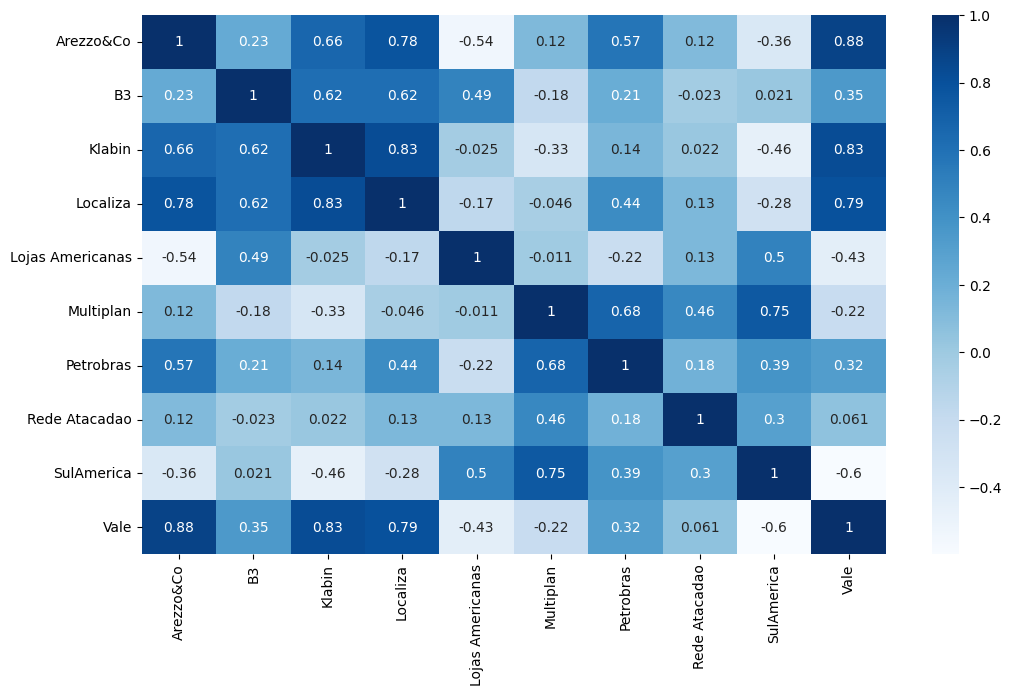

In [1242]:
#ENG: Plotting the heatmap with Pearson Correlatino
plt.figure(figsize = (12,7))
sns.heatmap(df.corr(),cmap="Blues",annot=True)
plt.show()

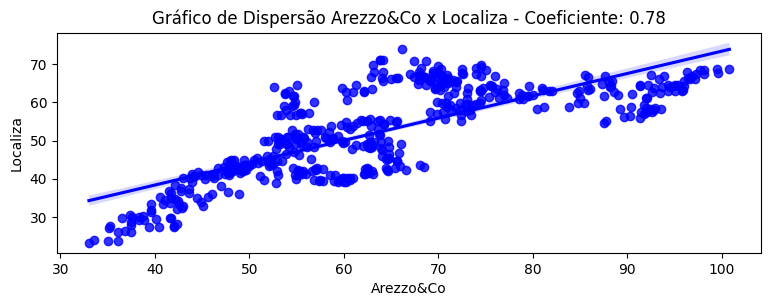

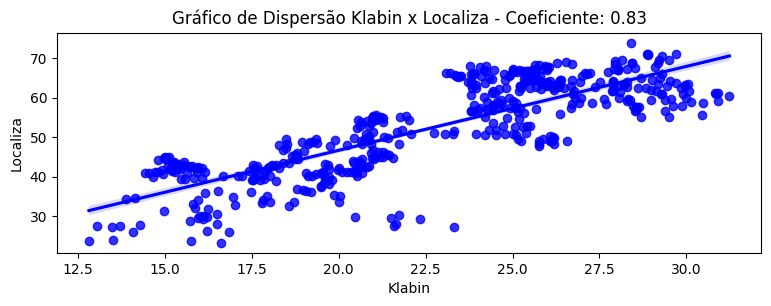

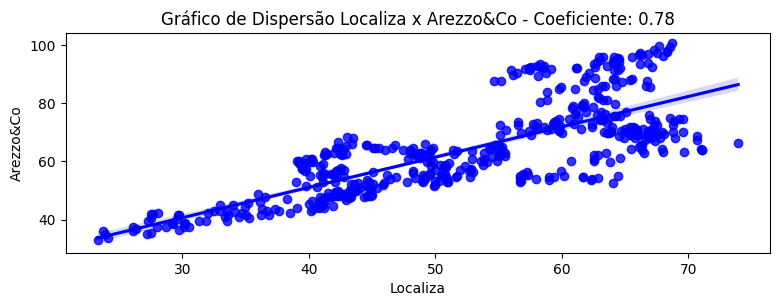

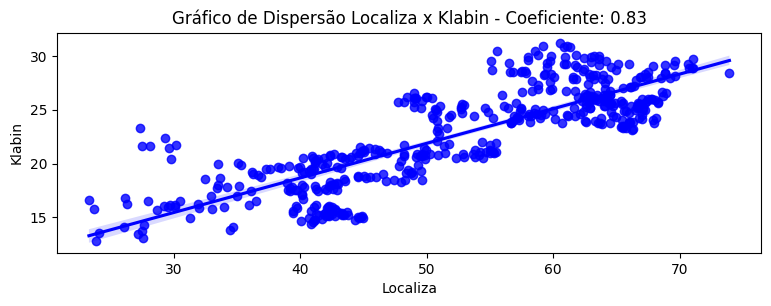

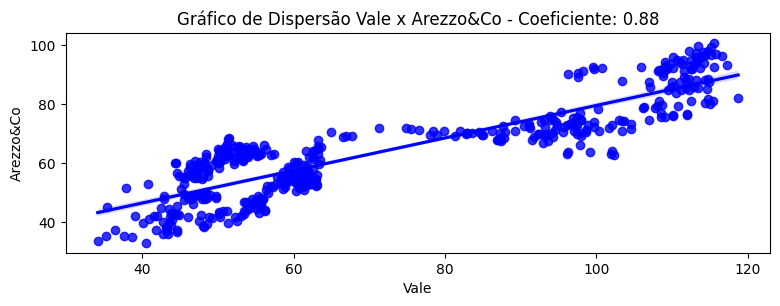

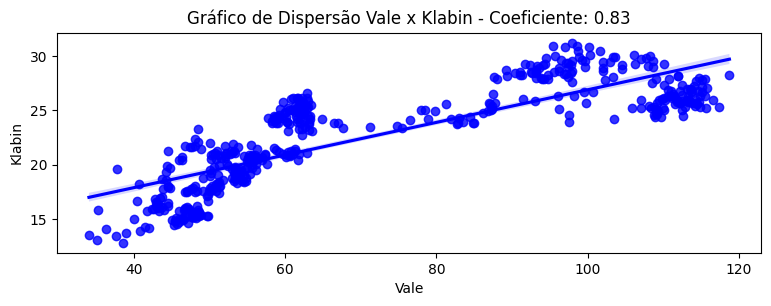

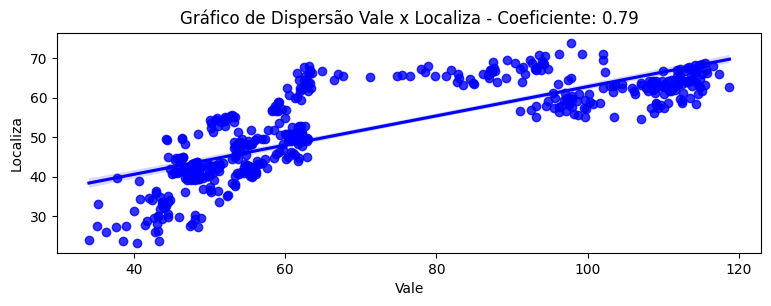

In [1243]:
#ENG: Plotting the scatter plot chart for which the Pearson correlation index is above 0.75

#Analisando as maiores correlações através do gráfico de dispersão (Scatter Plot)
#Selecionando apenas correlações fortes (acima de 0.8) e montando uma matriz de scatter plot
for k in column_names:
    for i in range(0, len(column_names)-1):
        if 0.75 <= abs(dfcorr[k][column_names[i]]) < 1.0:
            fig = plt.figure(figsize=(20,20))
            ax = plt.subplot(6, 2, i+1)
            sns.regplot(data=df, x=df[k], y=df[column_names[i]], color='b').set(title=f"Gráfico de Dispersão {k} x {column_names[i]} - Coeficiente: {round(dfcorr[k][column_names[i]],2)}")
            ax.set_xlabel(k)
            ax.set_ylabel(column_names[i])
            plt.show()

In [1244]:
#ENG: Calculating the VaR (Value at Risk) for each stock

#função para gerar os retornos e VaR de cada ação
def gera_var(k, df):
    
    returns = df[column_names[k]].dropna()
    
    alpha = 0.05
    var = np.percentile(returns, alpha*100)
    return returns, var

<function matplotlib.pyplot.show(close=None, block=None)>

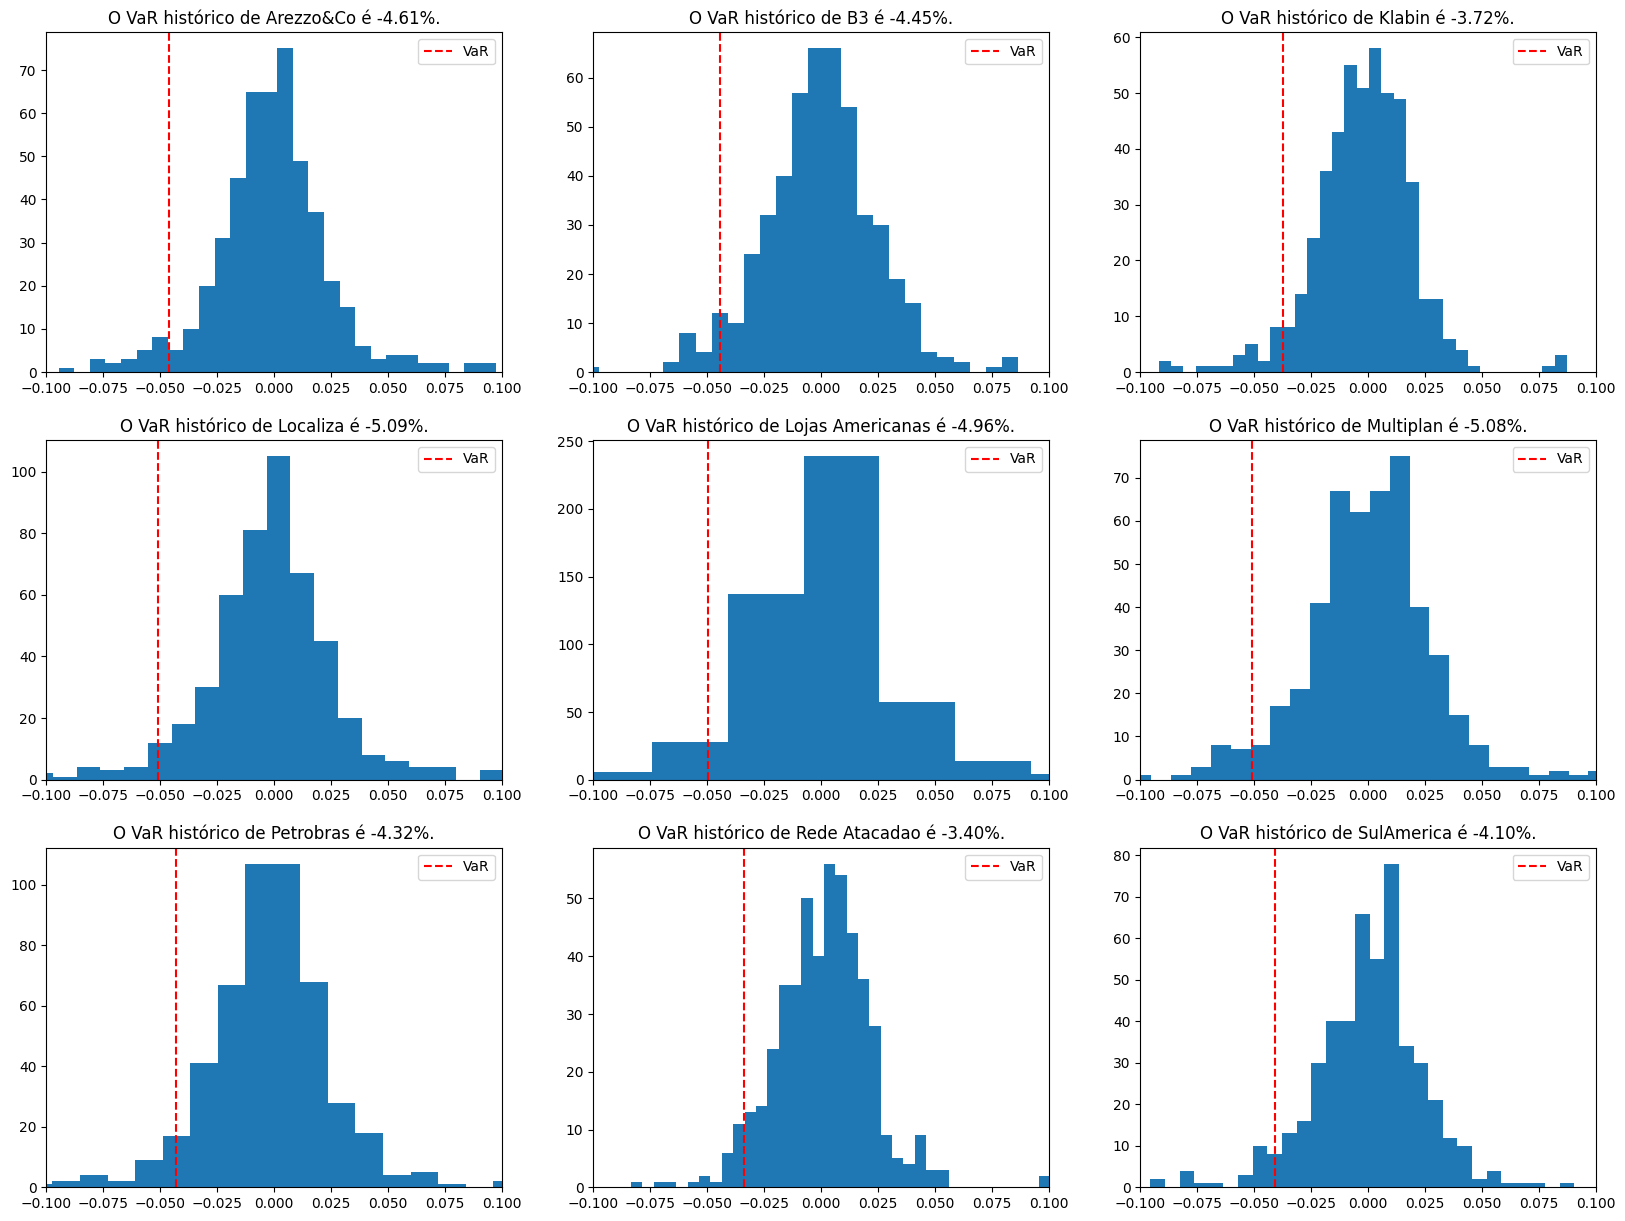

In [1245]:
#ENG: Create subplots with histograms and include the VaR information

#Montando loop para imprimir os histogramas com o VaR para cada Ação

nrows = 3
ncols = 3
k=0

# Cria a matriz de histogramas
fig, axs = plt.subplots(nrows, ncols, figsize=(20, 15))

for i in range(nrows):
    for j in range(ncols):
        
        returns , var = gera_var(k,dfret)
        
        axs[i,j].hist(returns, bins=50)
        axs[i,j].axvline(x=var, color='r', linestyle='--', label='VaR')
        axs[i,j].set_xlim(-0.1,0.1)
        axs[i,j].legend()
        axs[i,j].set_title(f"O VaR histórico de {column_names[k]} é {var:.2%}.")
        k = k+1

plt.show

In [1246]:
#ENG: Create new dataframes with stock returns pre-pandemic and post-pandemic, for backtesting purposes

#Montando novos dataframes com retornos pré-pandemia e pós-pandemia - o mesmo para volatilidade
dfvol_antes  = dfret.loc[:'2020-02-28'].std()
dfvol_depois = dfret.loc['2020-03-02':].std()
dfret_pre = dfret.loc[:'2020-02-28']
dfret_pos = dfret.loc['2020-03-02':]

for i in range(len(column_names)-1):
    print(f"{column_names[i]}: {dfvol_antes[column_names[i]]:.2%}")

Arezzo&Co: 1.86%
B3: 2.33%
Klabin: 1.91%
Localiza: 2.03%
Lojas Americanas: 2.24%
Multiplan: 1.83%
Petrobras: 2.10%
Rede Atacadao: 2.06%
SulAmerica: 1.90%


In [1247]:
for i in range(len(column_names)-1):
    print(f"{column_names[i]}: {dfvol_depois[column_names[i]]:.2%}")

Arezzo&Co: 3.33%
B3: 3.15%
Klabin: 2.67%
Localiza: 4.20%
Lojas Americanas: 8.63%
Multiplan: 3.80%
Petrobras: 4.37%
Rede Atacadao: 2.35%
SulAmerica: 3.24%


In [1248]:
#ENG: Create dataframes with the weighted portfolio

# Definindo o peso de cada ação na carteira
peso_carteira = [0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.2]
dfretcarteira = (peso_carteira * dfret)
dfretcart_pre = (peso_carteira * dfret_pre)
dfretcart_pos = (peso_carteira * dfret_pos)

dfretcarteira.head()

,Arezzo&Co,B3,Klabin,Localiza,Lojas Americanas,Multiplan,Petrobras,Rede Atacadao,SulAmerica,Vale
Data,,,,,,,,,,
2021-08-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-08-26,-0.001158,-0.002009,-0.001310,-0.004014,0.000000,-0.001909,-0.003510,-0.001600,-0.001014,-0.004886
2021-08-25,0.001435,0.002416,0.001138,0.002806,-0.002353,0.003465,0.000873,0.002385,0.002459,0.002586
2021-08-24,-0.000961,-0.000643,-0.003750,-0.000834,0.001033,0.000596,-0.000541,-0.000106,0.000867,0.000422
2021-08-23,-0.001624,-0.001799,-0.001948,-0.001087,-0.010562,-0.003055,-0.002030,-0.000371,-0.003106,-0.007040


In [1249]:
#ENG: Printing the volatility for the weighted portfolio
vol_carteira = 0
for i in column_names:
    vol_carteira = vol_carteira + dfretcarteira[i].std()
print(f"A volatilidade da carteira é: {vol_carteira:.2%}")

A volatilidade da carteira é: 3.81%


In [1250]:
#ENG: Calculating the weighted return of the portfolio

#Calculando o retorno da carteira
ret_carteira = dfretcarteira.sum(axis=1)
retcart_pre = dfretcart_pre.sum(axis=1)
retcart_pos = dfretcart_pos.sum(axis=1)
ret_acumulado = (ret_carteira + 1).cumprod()

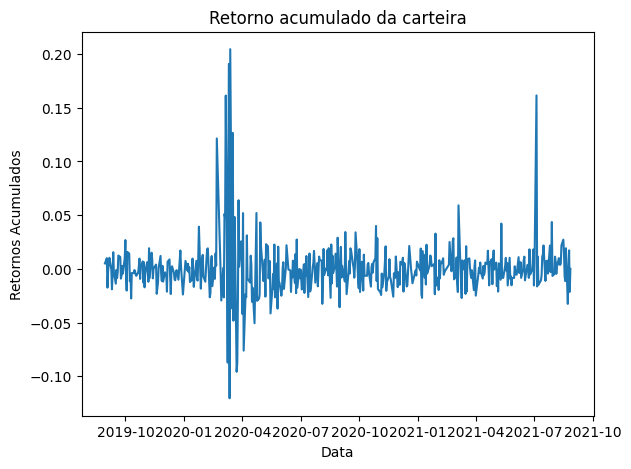

In [1251]:
#ENG: Plotting the weighted return of the portfolio

#Retorno da carteira ponderada
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.plot(ret_carteira)
ax1.set_xlabel('Data')
ax1.set_ylabel("Retornos Acumulados")
ax1.set_title("Retorno acumulado da carteira")
plt.show();

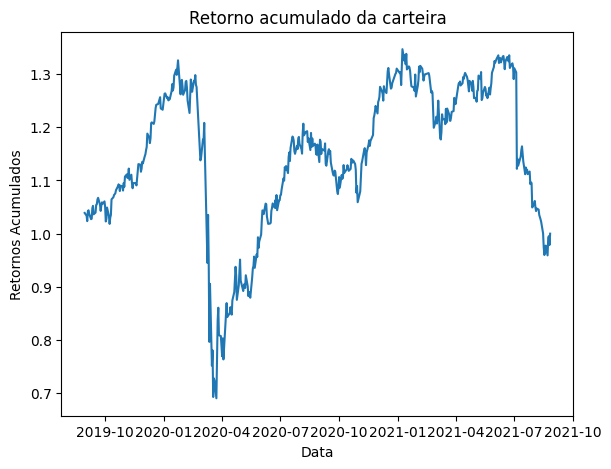

In [1252]:
#ENG: Accumulated returns for the weighted portfolio

#Retorno acumulado da carteira ponderada
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.plot(ret_acumulado)
ax1.set_xlabel('Data')
ax1.set_ylabel("Retornos Acumulados")
ax1.set_title("Retorno acumulado da carteira")
plt.show();

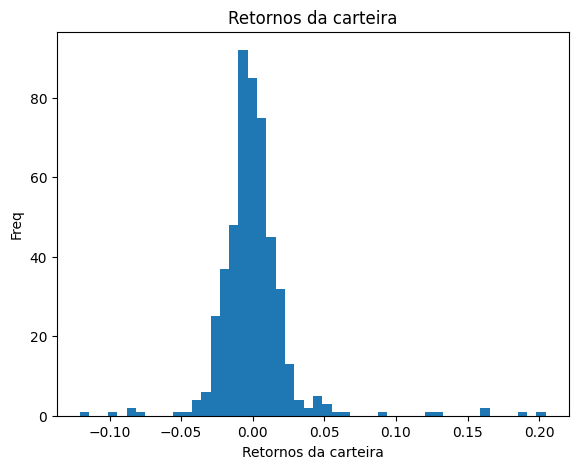

In [1257]:
#ENG: Plotting the histogram with returns for the portfolio

#Histograma com os retornos das carteiras
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.hist(ret_carteira, bins = 50)
ax1.set_xlabel('Retornos da carteira')
ax1.set_ylabel("Freq")
ax1.set_title("Retornos da carteira")
plt.show(); 

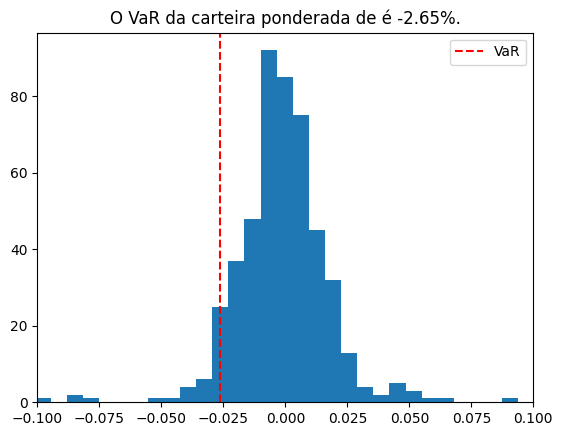

In [1258]:
#ENG: Plotting the histogram with VaR for the weighted portfolio

# plota o histograma dos retornos da carteira ponderada com a linha do percentil do VaR
var = np.percentile(ret_carteira, alpha*100)

plt.hist(ret_carteira, bins=50)
plt.axvline(x=var, color='r', linestyle='--', label='VaR')
plt.xlim(-0.1,0.1)
plt.legend()
plt.title(f"O VaR da carteira ponderada de é {var:.2%}.")
plt.show()

In [1259]:
#ENG: Comparing VaRs for backtesting purposes

# Calculando o VaR da carteira ponderada, e também dos 2 grupos utilizados para backtesting
alpha = 0.05
var = np.percentile(ret_carteira, alpha*100)
var_pre = np.percentile(retcart_pre, alpha*100)
var_pos = np.percentile(retcart_pos, alpha*100)
print(f"O percentual de VaR pré-pandemia é {var_pre:.2%}")
print(f"O percentual de VaR pós-pandemia é {var_pos:.2%}")
print(f"O percentual de VaR para todo o período é {var:.2%}")

O percentual de VaR pré-pandemia é -2.28%
O percentual de VaR pós-pandemia é -2.71%
O percentual de VaR para todo o período é -2.65%


In [1260]:
#ENG: Calculating and comparing the final VaR amounts considering R$1Mi BRL as the total amount of the portfolio

#Considerando uma carteira com R$1.000.000,00 em valor investido
#Cálculo dos valores de VaR para toda a carteira e também para os 2 grupos de backtesting
valor_investido = 1000000
print(f"O valor do VaR pré-pandemia é R${abs(round(var_pre*valor_investido,2))}")
print(f"O valor do VaR pós-pandemia é R${abs(round(var_pos*valor_investido,2))}")
print(f"O valor do VaR para todo o período é R${abs(round(var*valor_investido,2))}")

O valor do VaR pré-pandemia é R$22779.28
O valor do VaR pós-pandemia é R$27107.45
O valor do VaR para todo o período é R$26541.52
